## How to create plots in Python

In [1]:
import matplotlib.pyplot as plt

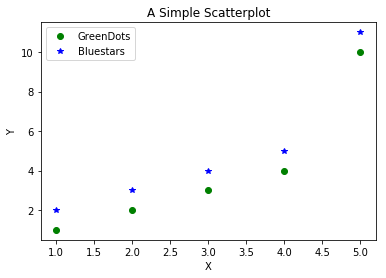

In [2]:
plt.plot([1,2,3,4,5], [1,2,3,4,10], 'go', label='GreenDots')
plt.plot([1,2,3,4,5], [2,3,4,5,11], 'b*', label='Bluestars')
plt.title('A Simple Scatterplot')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='best')  # legend text comes from the plot's label parameter.
plt.show()

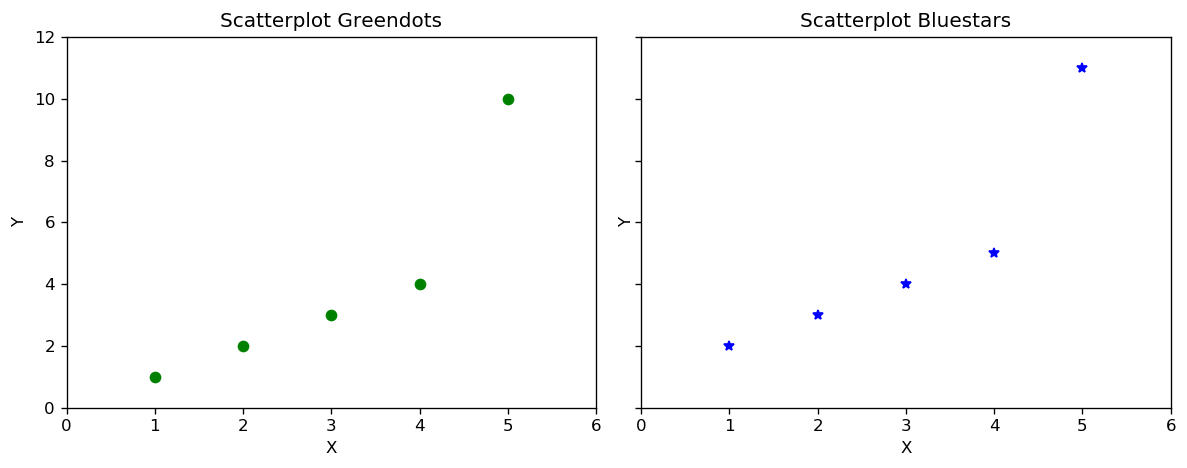

In [3]:
# Create Figure and Subplots
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4), sharey=True, dpi=120)

# Plot
ax1.plot([1,2,3,4,5], [1,2,3,4,10], 'go')  # greendots
ax2.plot([1,2,3,4,5], [2,3,4,5,11], 'b*')  # bluestart

# Title, X and Y labels, X and Y Lim
ax1.set_title('Scatterplot Greendots'); ax2.set_title('Scatterplot Bluestars')
ax1.set_xlabel('X');  ax2.set_xlabel('X')  # x label
ax1.set_ylabel('Y');  ax2.set_ylabel('Y')  # y label
ax1.set_xlim(0, 6) ;  ax2.set_xlim(0, 6)   # x axis limits
ax1.set_ylim(0, 12);  ax2.set_ylim(0, 12)  # y axis limits

# ax2.yaxis.set_ticks_position('none') 
plt.tight_layout()
plt.show()

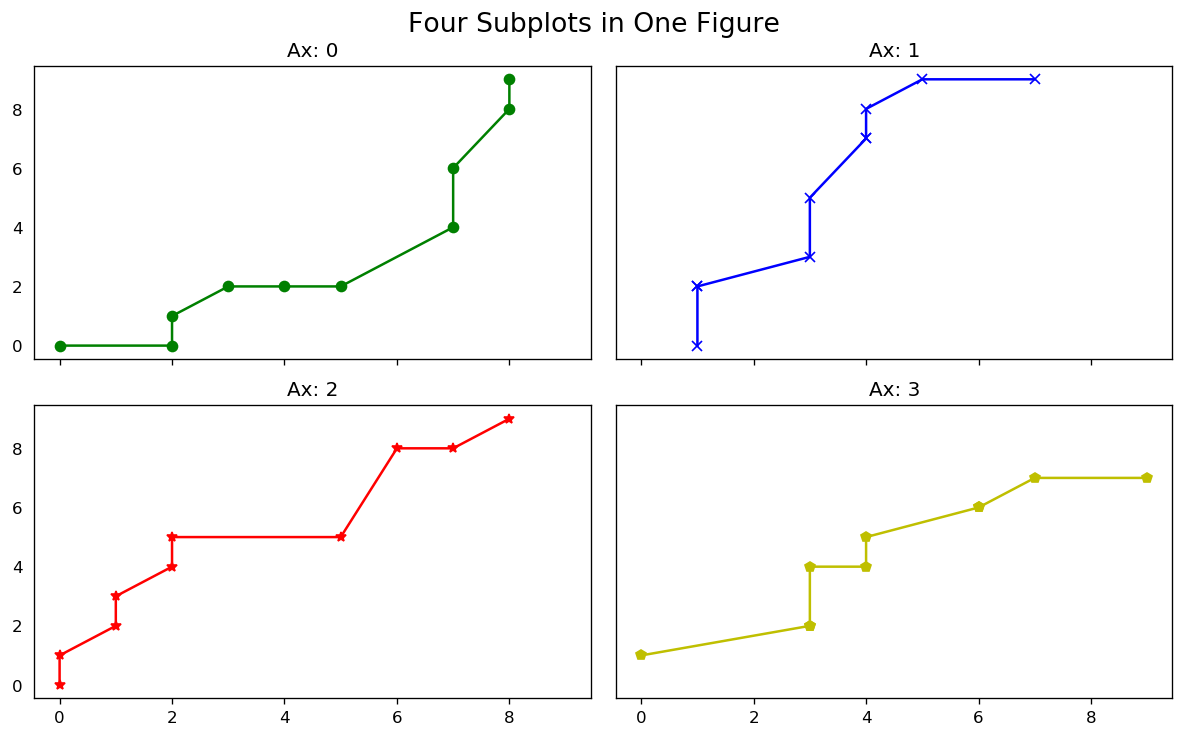

In [4]:
# Draw multiple plots using for-loops using object oriented syntax
import numpy as np
from numpy.random import seed, randint
seed(100)

# Create Figure and Subplots
fig, axes = plt.subplots(2,2, figsize=(10,6), sharex=True, sharey=True, dpi=120)

# Define the colors and markers to use
colors = {0:'g', 1:'b', 2:'r', 3:'y'}
markers = {0:'o', 1:'x', 2:'*', 3:'p'}

# Plot each axes
for i, ax in enumerate(axes.ravel()):
    ax.plot(sorted(randint(0,10,10)), sorted(randint(0,10,10)), marker=markers[i], color=colors[i])  
    ax.set_title('Ax: ' + str(i))
    ax.yaxis.set_ticks_position('none')

plt.suptitle('Four Subplots in One Figure', verticalalignment='bottom', fontsize=16)    
plt.tight_layout()
plt.show()

## How to Modify the Axis Ticks Positions and Labels
There are 3 basic things you will probably ever need in matplotlib when it comes to manipulating axis ticks:
1. How to control the position and tick labels? (using plt.xticks() or ax.setxticks() and ax.setxticklabels())
2. How to control which axis’s ticks (top/bottom/left/right) should be displayed (using plt.tick_params())
3. Functional formatting of tick labels

If you are using ax syntax, you can use ax.set_xticks() and ax.set_xticklabels() to set the positions and label texts respectively. If you are using the plt syntax, you can set both the positions as well as the label text in one call using the plt.xticks().

Actually, if you look at the code of plt.xticks() method (by typing ??plt.xticks in jupyter notebook), it calls ax.set_xticks() and ax.set_xticklabels() to do the job. plt.xticks takes the ticks and labels as required parameters but you can also adjust the label’s fontsize, rotation, ‘horizontalalignment’ and ‘verticalalignment’ of the hinge points on the labels, like I’ve done in the below example.
In above below, plt.tick_params() is used to determine which all axis of the plot (‘top’ / ‘bottom’ / ‘left’ / ‘right’) you want to draw the ticks and which direction (‘in’ / ‘out’) the tick should point to.

the matplotlib.ticker module provides the FuncFormatter to determine how the final tick label should be shown.

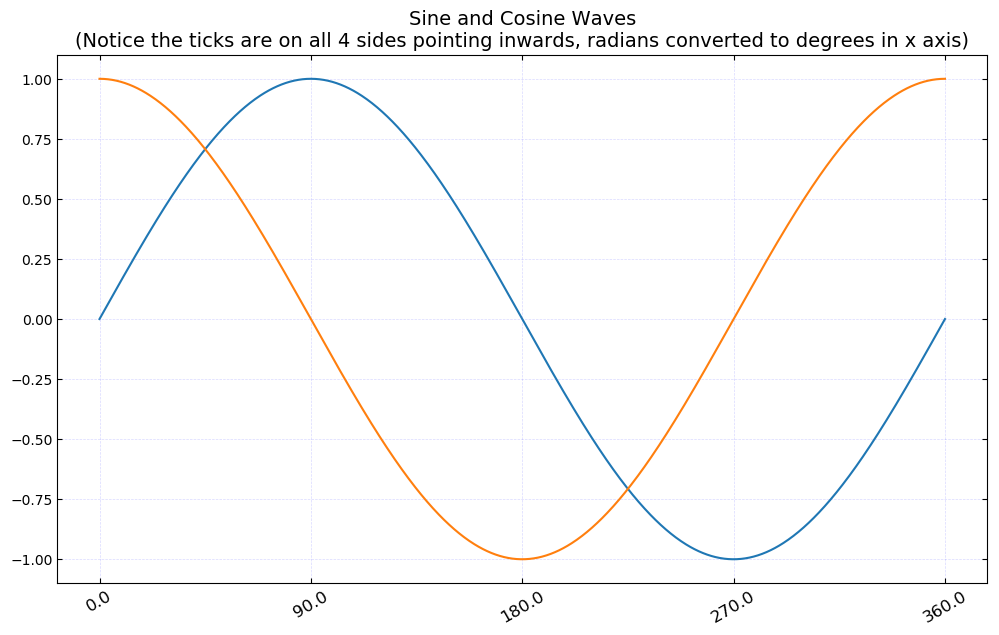

In [5]:
from matplotlib.ticker import FuncFormatter

def rad_to_degrees(x, pos):
    'converts radians to degrees'
    return round(x * 57.2985, 2)

plt.figure(figsize=(12,7), dpi=100)
X = np.linspace(0,2*np.pi,1000)
plt.plot(X,np.sin(X))
plt.plot(X,np.cos(X))

# 1. Adjust x axis Ticks
plt.xticks(ticks=np.arange(0, 440/57.2985, 90/57.2985), fontsize=12, rotation=30, ha='center', va='top')  # 1 radian = 57.2985 degrees

# 2. Tick Parameters
plt.tick_params(axis='both',bottom=True, top=True, left=True, right=True, direction='in', which='major', grid_color='blue')

# 3. Format tick labels to convert radians to degrees
formatter = FuncFormatter(rad_to_degrees)
plt.gca().xaxis.set_major_formatter(formatter)

plt.grid(linestyle='--', linewidth=0.5, alpha=0.15)
plt.title('Sine and Cosine Waves\n(Notice the ticks are on all 4 sides pointing inwards, radians converted to degrees in x axis)', fontsize=14)
plt.show()


## Understanding the rcParams, Colors and Plot Styles
Matplotlib comes with pre-built styles which you can look by typing:
plt.style.available
 ['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight',
 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk',
 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale',  'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted',
 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10',
 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']

In [8]:

# View first 10 Palettes
dir(plt.cm)[:10]
#> ['Accent', 'Accent_r', 'Blues', 'Blues_r',
#>  'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r']

['Accent',
 'Accent_r',
 'Blues',
 'Blues_r',
 'BrBG',
 'BrBG_r',
 'BuGn',
 'BuGn_r',
 'BuPu',
 'BuPu_r']

## How to customize a legend.
The most common way to make a legend is to define the label parameter for each of the plots and finally call plt.legend().

However, sometimes you might want to construct the legend on your own. In that case, you need to pass the plot items you want to draw the legend for and the legend text as parameters to plt.legend() in the following format:

plt.legend((line1, line2, line3), ('label1', 'label2', 'label3'))

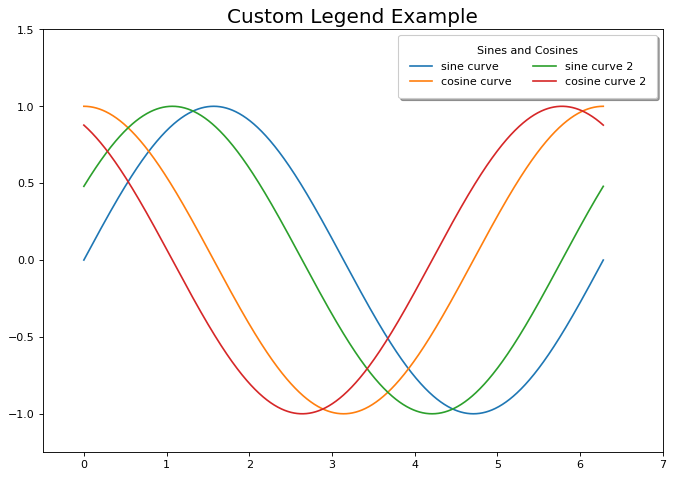

In [10]:
# plt.style.use('seaborn-notebook')
plt.figure(figsize=(10,7), dpi=80)
X = np.linspace(0, 2*np.pi, 1000)
sine = plt.plot(X,np.sin(X)); cosine = plt.plot(X,np.cos(X))
sine_2 = plt.plot(X,np.sin(X+.5)); cosine_2 = plt.plot(X,np.cos(X+.5))
plt.gca().set(ylim=(-1.25, 1.5), xlim=(-.5, 7))
plt.title('Custom Legend Example', fontsize=18)

# Modify legend
plt.legend([sine[0], cosine[0], sine_2[0], cosine_2[0]],   # plot items
           ['sine curve', 'cosine curve', 'sine curve 2', 'cosine curve 2'],  
           frameon=True,                                   # legend border
           framealpha=1,                                   # transparency of border
           ncol=2,                                         # num columns
           shadow=True,                                    # shadow on
           borderpad=1,                                    # thickness of border
           title='Sines and Cosines')                      # title
plt.show()

## How to Add Texts, Arrows and Annotations
plt.text and plt.annotate adds the texts and annotations respectively. If you have to plot multiple texts you need to call plt.text() as many times typically in a for-loop.

Let’s annotate the peaks and troughs adding arrowprops and a bbox for the text.

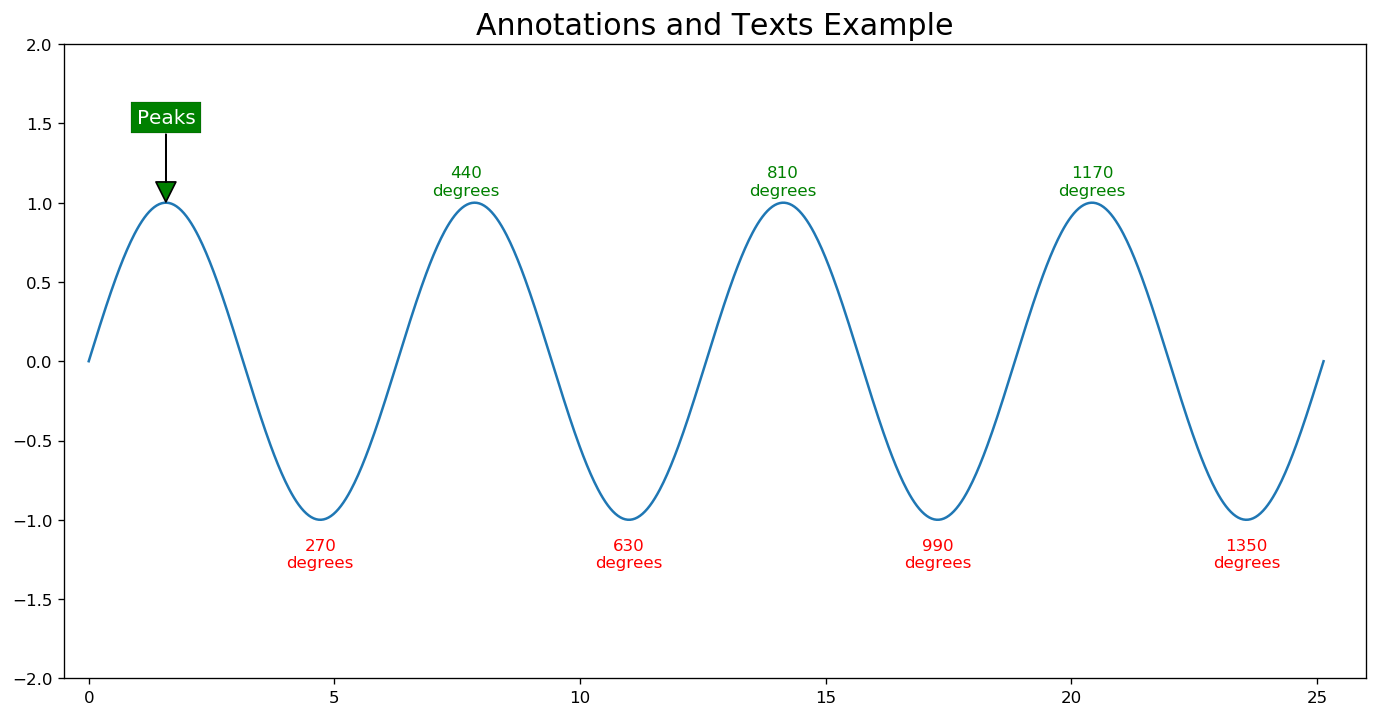

In [11]:
# Texts, Arrows and Annotations Example
# ref: https://matplotlib.org/users/annotations_guide.html
plt.figure(figsize=(14,7), dpi=120)
X = np.linspace(0, 8*np.pi, 1000)
sine = plt.plot(X,np.sin(X), color='tab:blue');

# 1. Annotate with Arrow Props and bbox
plt.annotate('Peaks', xy=(90/57.2985, 1.0), xytext=(90/57.2985, 1.5),
             bbox=dict(boxstyle='square', fc='green', linewidth=0.1),
             arrowprops=dict(facecolor='green', shrink=0.01, width=0.1), 
             fontsize=12, color='white', horizontalalignment='center')

# 2. Texts at Peaks and Troughs
for angle in [440, 810, 1170]:
    plt.text(angle/57.2985, 1.05, str(angle) + "\ndegrees", transform=plt.gca().transData, horizontalalignment='center', color='green')

for angle in [270, 630, 990, 1350]:
    plt.text(angle/57.2985, -1.3, str(angle) + "\ndegrees", transform=plt.gca().transData, horizontalalignment='center', color='red')    

plt.gca().set(ylim=(-2.0, 2.0), xlim=(-.5, 26))
plt.title('Annotations and Texts Example', fontsize=18)
plt.show()

Notice, all the text we plotted above was in relation to the data.

That is, the x and y position in the plt.text() corresponds to the values along the x and y axes. However, sometimes you might work with data of different scales on different subplots and you want to write the texts in the same position on all the subplots.

In such case, instead of manually computing the x and y positions for each axes, you can specify the x and y values in relation to the axes (instead of x and y axis values).

You can do this by setting transform=ax.transData.

The lower left corner of the axes has (x,y) = (0,0) and the top right corner will correspond to (1,1).

The below plot shows the position of texts for the same values of (x,y) = (0.50, 0.02) with respect to the Data(transData), Axes(transAxes) and Figure(transFigure) respectively.

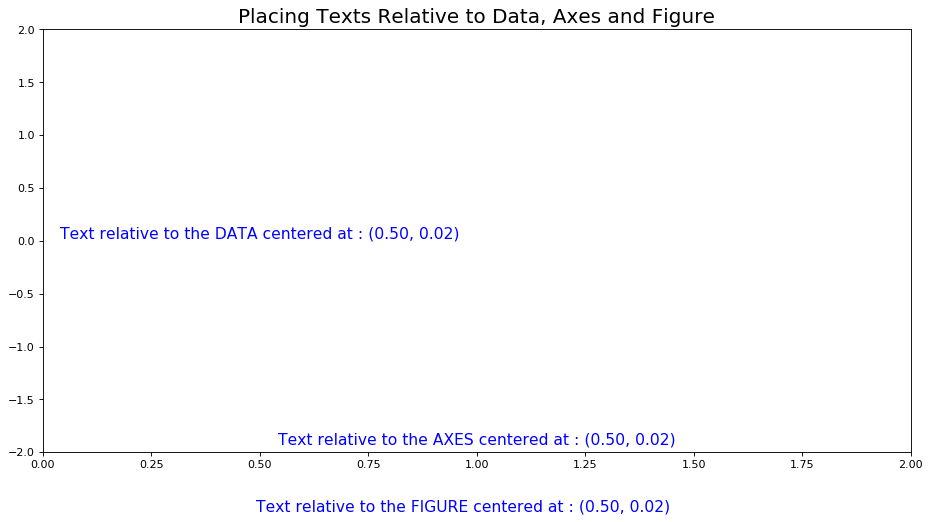

In [12]:
# Texts, Arrows and Annotations Example
plt.figure(figsize=(14,7), dpi=80)
X = np.linspace(0, 8*np.pi, 1000)

# Text Relative to DATA
plt.text(0.50, 0.02, "Text relative to the DATA centered at : (0.50, 0.02)", transform=plt.gca().transData, fontsize=14, ha='center', color='blue')

# Text Relative to AXES
plt.text(0.50, 0.02, "Text relative to the AXES centered at : (0.50, 0.02)", transform=plt.gca().transAxes, fontsize=14, ha='center', color='blue')

# Text Relative to FIGURE
plt.text(0.50, 0.02, "Text relative to the FIGURE centered at : (0.50, 0.02)", transform=plt.gcf().transFigure, fontsize=14, ha='center', color='blue')

plt.gca().set(ylim=(-2.0, 2.0), xlim=(0, 2))
plt.title('Placing Texts Relative to Data, Axes and Figure', fontsize=18)
plt.show()

How to customize matplotlib’s subplots layout
Matplotlib provides two convenient ways to create customized multi-subplots layout.

plt.subplot2grid
plt.GridSpec
Both plt.subplot2grid and plt.GridSpec lets you draw complex layouts. Below is a nice plt.subplot2grid example.

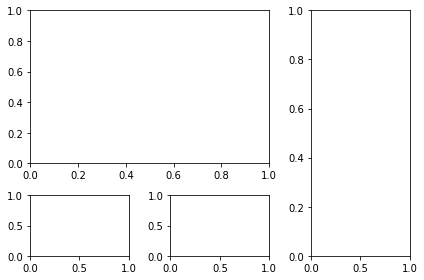

In [13]:
# Supplot2grid approach
fig = plt.figure()
ax1 = plt.subplot2grid((3,3), (0,0), colspan=2, rowspan=2) # topleft
ax3 = plt.subplot2grid((3,3), (0,2), rowspan=3)            # right
ax4 = plt.subplot2grid((3,3), (2,0))                       # bottom left
ax5 = plt.subplot2grid((3,3), (2,1))                       # bottom right
fig.tight_layout()

Below is an example of an inner plot that zooms in to a larger plot.

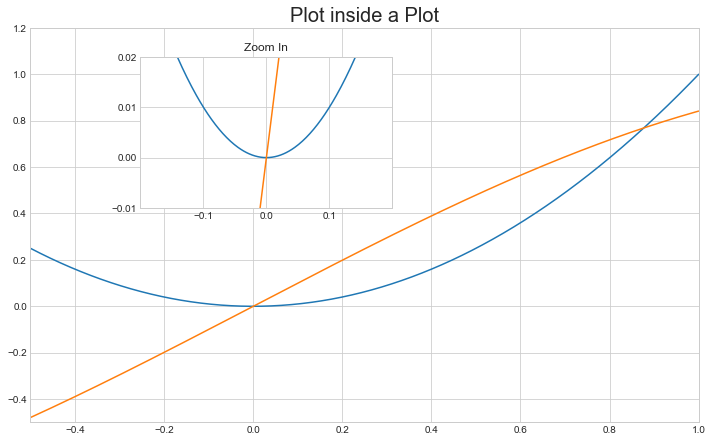

NameError: name 'mpl' is not defined

In [14]:
# Plot inside a plot
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(10,6))
x = np.linspace(-0.50, 1., 1000)

# Outer Plot
ax.plot(x, x**2)
ax.plot(x, np.sin(x))
ax.set(xlim=(-0.5, 1.0), ylim=(-0.5,1.2))
fig.tight_layout()

# Inner Plot
inner_ax = fig.add_axes([0.2, 0.55, 0.35, 0.35]) # x, y, width, height
inner_ax.plot(x, x**2)
inner_ax.plot(x, np.sin(x))
inner_ax.set(title='Zoom In', xlim=(-.2, .2), ylim=(-.01, .02), 
             yticks = [-0.01, 0, 0.01, 0.02], xticks=[-0.1,0,.1])
ax.set_title("Plot inside a Plot", fontsize=20)
plt.show()
mpl.rcParams.update(mpl.rcParamsDefault)  # reset to defaults

## How is scatterplot drawn with plt.plot different from plt.scatter
The difference is plt.plot() does not provide options to change the color and size of point dynamically (based on another array). But plt.scatter() allows you to do that.

By varying the size and color of points, you can create nice looking bubble plots.

Another convenience is you can directly use a pandas dataframe to set the x and y values, provided you specify the source dataframe in the data argument.

You can also set the color 'c' and size 's' of the points from one of the dataframe columns itself.

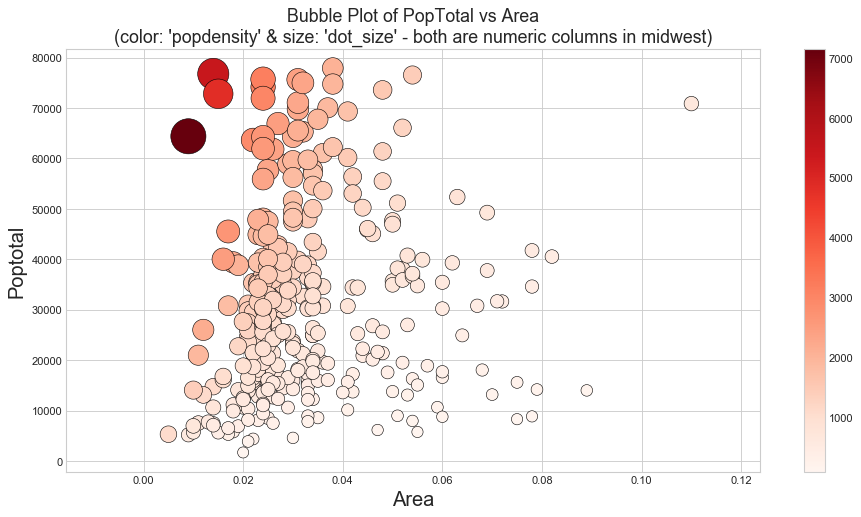

In [15]:
# Scatterplot with varying size and color of points
import pandas as pd
midwest = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv")

# Plot
fig = plt.figure(figsize=(14, 7), dpi= 80, facecolor='w', edgecolor='k')    
plt.scatter('area', 'poptotal', data=midwest, s='dot_size', c='popdensity', cmap='Reds', edgecolors='black', linewidths=.5)
plt.title("Bubble Plot of PopTotal vs Area\n(color: 'popdensity' & size: 'dot_size' - both are numeric columns in midwest)", fontsize=16)
plt.xlabel('Area', fontsize=18)
plt.ylabel('Poptotal', fontsize=18)
plt.colorbar()
plt.show()  

## How to draw Histograms, Boxplots and Time Series
The methods to draw different types of plots are present in pyplot (plt) as well as Axes. The below example shows basic examples of few of the commonly used plot types.

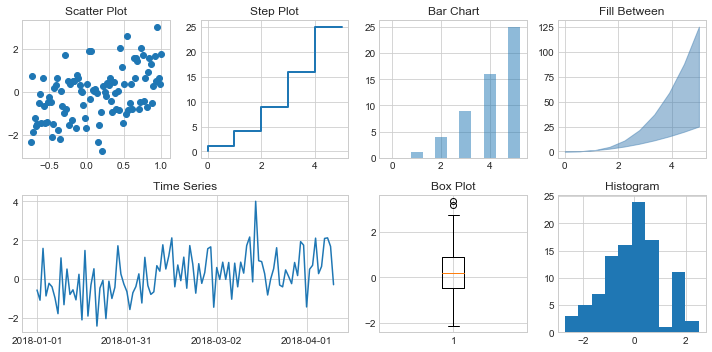

In [17]:
import pandas as pd

# Setup the subplot2grid Layout
fig = plt.figure(figsize=(10, 5))
ax1 = plt.subplot2grid((2,4), (0,0)) 
ax2 = plt.subplot2grid((2,4), (0,1)) 
ax3 = plt.subplot2grid((2,4), (0,2)) 
ax4 = plt.subplot2grid((2,4), (0,3)) 
ax5 = plt.subplot2grid((2,4), (1,0), colspan=2) 
ax6 = plt.subplot2grid((2,4), (1,2)) 
ax7 = plt.subplot2grid((2,4), (1,3)) 

# Input Arrays
n = np.array([0,1,2,3,4,5])
x = np.linspace(0,5,10)
xx = np.linspace(-0.75, 1., 100)

# Scatterplot
ax1.scatter(xx, xx + np.random.randn(len(xx)))
ax1.set_title("Scatter Plot")

# Step Chart
ax2.step(n, n**2, lw=2)
ax2.set_title("Step Plot")

# Bar Chart
ax3.bar(n, n**2, align="center", width=0.5, alpha=0.5)
ax3.set_title("Bar Chart")

# Fill Between
ax4.fill_between(x, x**2, x**3, color="steelblue", alpha=0.5);
ax4.set_title("Fill Between");

# Time Series
dates = pd.date_range('2018-01-01', periods = len(xx))
ax5.plot(dates, xx + np.random.randn(len(xx)))
ax5.set_xticks(dates[::30])
ax5.set_xticklabels(dates.strftime('%Y-%m-%d')[::30])
ax5.set_title("Time Series")

# Box Plot
ax6.boxplot(np.random.randn(len(xx)))
ax6.set_title("Box Plot")

# Histogram
ax7.hist(xx + np.random.randn(len(xx)))
ax7.set_title("Histogram")

fig.tight_layout()

## How to Plot with two Y-Axis
Plotting a line chart on the left-hand side axis is straightforward, which you’ve already seen.

So how to draw the second line on the right-hand side y-axis?

The trick is to activate the right hand side Y axis using ax.twinx() to create a second axes.

This second axes will have the Y-axis on the right activated and shares the same x-axis as the original ax. Then, whatever you draw using this second axes will be referenced to the secondary y-axis. The remaining job is to just color the axis and tick labels to match the color of the lines.

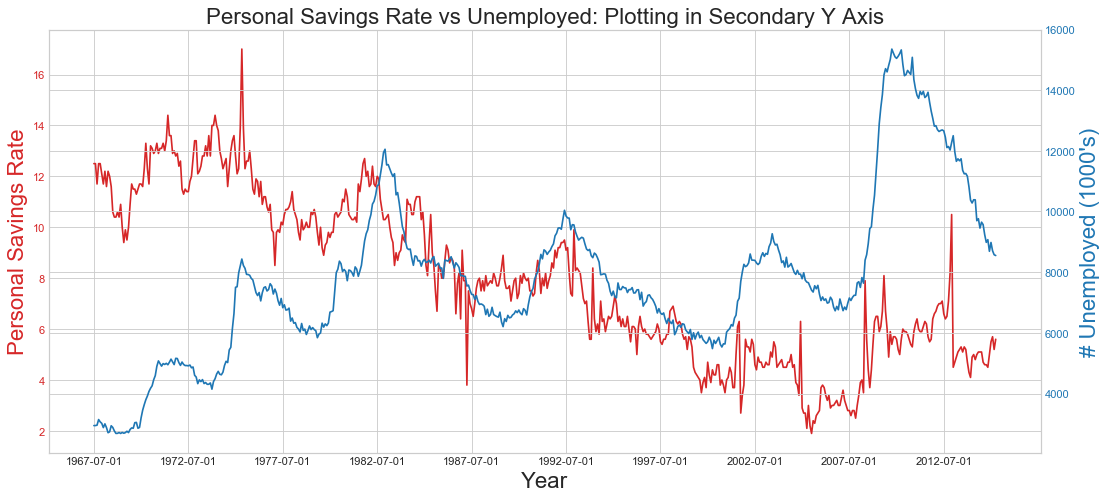

In [18]:
# Import Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/economics.csv")
x = df['date']; y1 = df['psavert']; y2 = df['unemploy']

# Plot Line1 (Left Y Axis)
fig, ax1 = plt.subplots(1,1,figsize=(16,7), dpi= 80)
ax1.plot(x, y1, color='tab:red')

# Plot Line2 (Right Y Axis)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(x, y2, color='tab:blue')

# Just Decorations!! -------------------
# ax1 (left y axis)
ax1.set_xlabel('Year', fontsize=20)
ax1.set_ylabel('Personal Savings Rate', color='tab:red', fontsize=20)
ax1.tick_params(axis='y', rotation=0, labelcolor='tab:red' )

# ax2 (right Y axis)
ax2.set_ylabel("# Unemployed (1000's)", color='tab:blue', fontsize=20)
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.set_title("Personal Savings Rate vs Unemployed: Plotting in Secondary Y Axis", fontsize=20)
ax2.set_xticks(np.arange(0, len(x), 60))
ax2.set_xticklabels(x[::60], rotation=90, fontdict={'fontsize':10})
plt.show()

## Introduction to Seaborn
As the charts get more complex, the more the code you’ve got to write. For example, in matplotlib, there is no direct method to draw a density plot of a scatterplot with line of best fit. You get the idea.

So, what you can do instead is to use a higher level package like seaborn, and use one of its prebuilt functions to draw the plot.

We are not going in-depth into seaborn. But let’s see how to get started and where to find what you want. A lot of seaborn’s plots are suitable for data analysis and the library works seamlessly with pandas dataframes.

seaborn is typically imported as sns. Like matplotlib it comes with its own set of pre-built styles and palettes.

C:\Users\owner\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


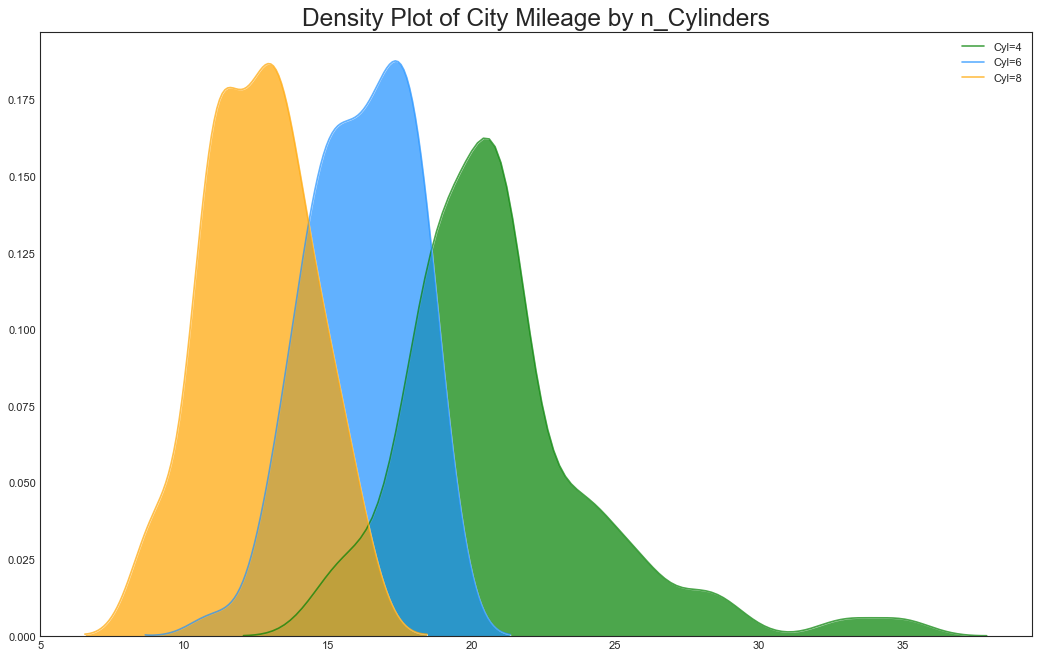

In [19]:
import seaborn as sns
sns.set_style("white")

# Import Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(df.loc[df['cyl'] == 4, "cty"], shade=True, color="g", label="Cyl=4", alpha=.7)
sns.kdeplot(df.loc[df['cyl'] == 6, "cty"], shade=True, color="dodgerblue", label="Cyl=6", alpha=.7)
sns.kdeplot(df.loc[df['cyl'] == 8, "cty"], shade=True, color="orange", label="Cyl=8", alpha=.7)

# Decoration
plt.title('Density Plot of City Mileage by n_Cylinders', fontsize=22)
plt.legend()
plt.show()

<Figure size 800x640 with 0 Axes>

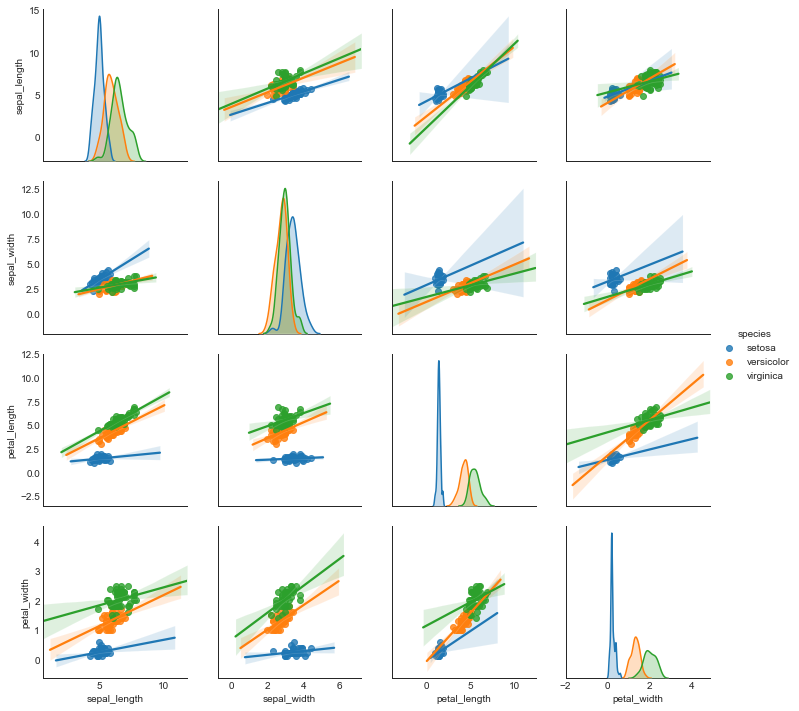

In [20]:
# Load Dataset
# To find out more about Seaborn, go to the Seaborn Tutorial page.
df = sns.load_dataset('iris')

# Plot
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df, kind="reg", hue="species")
plt.show()